In [23]:
import glob
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# def normal_accum(results, count, eval_code):
#     value = 0
#     epsilons = []
#     for result, epsilon in results:
#         epsilons.append(epsilon)
#         value += result[eval_code][-1][0]
#     if len(results) > 1:
#         assert epsilons[0] == epsilons[1], "epsilon bag"

#     return value / count, epsilons[0]

def get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score="auroc"):
    dirs = glob.glob("results/2022*")
    results = []
    count = 0
    for dir in dirs:
        with open(dir + "/param.json", "r") as f:
            params = json.load(f)
        
        if params["noise_for_small"]==noise_for_small and params["noise_for_large"]==noise_for_large and params["share_abnormal_ratio"]==share_abnormal_ratio and params["n_small_users"]==n_small_users:
            count += params["ITR"]
            with open(dir + "/scores.pkl", "rb") as f:
                results.append([pickle.load(f)[0][eval_score] * params["ITR"], params["epsilon"]])
        
    #print(f"{len(results)} file found")
    
    return np.array(results)[:,0].sum() / count, results[0][1]

#eval_score_transform = {"f1": 5, "auroc":4, "precision":3, "recall":2, "accuracy":1, "loss": 0}
#eval_score = "auroc"

In [78]:
# eval_score = "recall"
#eval_code = eval_score_transform["auroc"]

recall


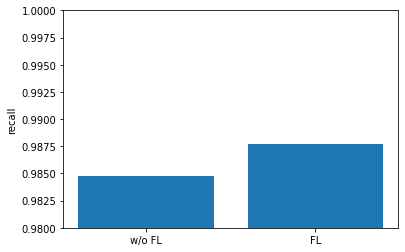

FLしたらrecallが上がる
auroc


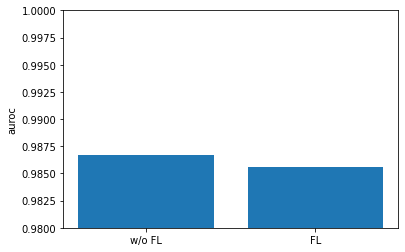

FLしたら精度が下がる
unbalance な データだから？


In [79]:
eval_score = "recall"

result_only_large, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
result, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)

left = np.arange(2)
labels = ["w/o FL", "FL"]

print(eval_score)
plt.bar(left, [result_only_large, result])
plt.xticks(left, labels)
plt.ylim(0.98,1)
plt.ylabel(eval_score)
plt.show()

print("FLしたらrecallが上がる")

####

eval_score = "auroc"

result_only_large, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
result, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)

left = np.arange(2)
labels = ["w/o FL", "FL"]

print(eval_score)
plt.bar(left, [result_only_large, result])
plt.xticks(left, labels)
plt.ylim(0.98,1)
plt.ylabel(eval_score)
plt.show()


print("FLしたら精度が下がる")
print("unbalance な データだから？")

recall


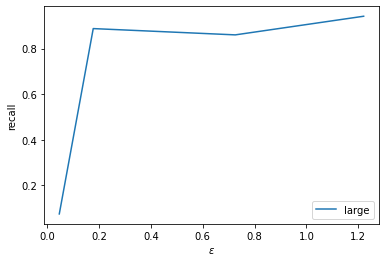

大規模、小規模ともににDPを導入
auroc


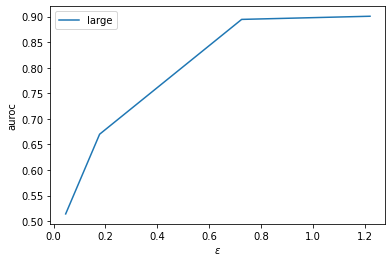

In [80]:
epsilons = []
large_results = []
noises = [5,8,30,100]

eval_score = "recall"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("大規模、小規模ともににDPを導入")

##

epsilons = []
large_results = []
noises = [5,8,30,100]

eval_score = "auroc"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

recall


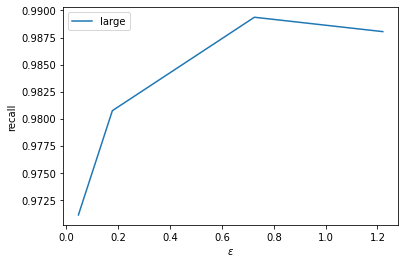

小規模だけにDPを導入
大規模がDPを導入していた時よりも、大分良くなる
auroc


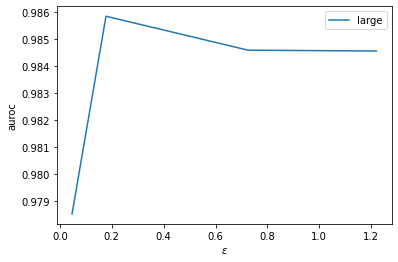

小規模だけにDPを導入
大規模がDPを導入していた時よりも、大分良くなる


In [81]:
epsilons = []
large_results = []
noise_for_smalls = [5,8,30,100]

eval_score = "recall"
for noise_for_small in noise_for_smalls:
    result, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("小規模だけにDPを導入")
print("大規模がDPを導入していた時よりも、大分良くなる")


##
epsilons = []
large_results = []
noise_for_smalls = [5,8,30,100]

eval_score = "auroc"
for noise_for_small in noise_for_smalls:
    result, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("小規模だけにDPを導入")
print("大規模がDPを導入していた時よりも、大分良くなる")

recall


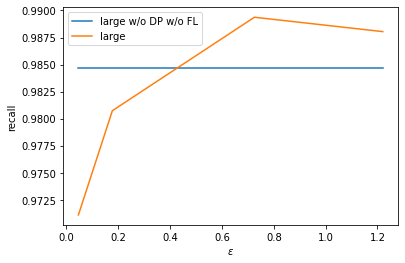

large w/o DP w/o FLは大規模がDPもFLも導入していない。
largeは小規模だけにDPを導入してFL
小規模病院のノイズが小さければrecallが上がるが、大きければrecallが下がる
recall
auroc


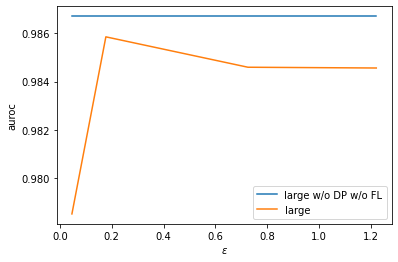

large w/o DP w/o FLは大規模がDPもFLも導入していない。
largeは小規模だけにDPを導入してFL
ノイズを加えた小規模を加えるなら、FLしない方が良い


In [82]:
epsilons = []
large_results = []
only_large_wo_noise_results = []
noise_for_smalls = [5,8,30,100]
eval_score = "recall"

for noise_for_small in noise_for_smalls:
    result, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large_wo_noise, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)
    only_large_wo_noise_results.append(result_only_large_wo_noise)

print(eval_score)
plt.plot(epsilons, only_large_wo_noise_results, label="large w/o DP w/o FL")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("large w/o DP w/o FLは大規模がDPもFLも導入していない。")
print("largeは小規模だけにDPを導入してFL")
print("小規模病院のノイズが小さければrecallが上がるが、大きければrecallが下がる")

##

print(eval_score)
epsilons = []
large_results = []
only_large_wo_noise_results = []
noise_for_smalls = [5,8,30,100]
eval_score = "auroc"

for noise_for_small in noise_for_smalls:
    result, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large_wo_noise, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)
    only_large_wo_noise_results.append(result_only_large_wo_noise)

print(eval_score)
plt.plot(epsilons, only_large_wo_noise_results, label="large w/o DP w/o FL")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("large w/o DP w/o FLは大規模がDPもFLも導入していない。")
print("largeは小規模だけにDPを導入してFL")
print("ノイズを加えた小規模を加えるなら、FLしない方が良い")

recall


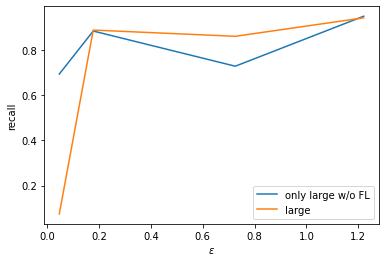

only large w/o は大規模だけでDP導入、FLをしていない。
largeは小規模、大規模ともにDP導入
大規模小規模ともにDPを導入している場合、recallはあまり変わらない
auroc


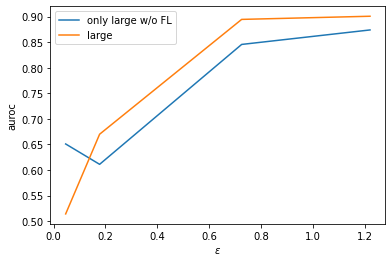

only large w/o は大規模だけでDP導入、FLをしていない。
largeは小規模、大規模ともにDP導入
大規模がDPを導入している場合、FLをした方が精度が良い


In [83]:
epsilons = []
large_results = []
only_large_results = []

large_results_only_large = []

noises = [5,8,30,100]

eval_score = "recall"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large, _ = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    only_large_results.append(result_only_large)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, only_large_results, label="only large w/o FL")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("only large w/o は大規模だけでDP導入、FLをしていない。")
print("largeは小規模、大規模ともにDP導入")
print("大規模小規模ともにDPを導入している場合、recallはあまり変わらない")

##

epsilons = []
large_results = []
only_large_results = []

large_results_only_large = []

noises = [5,8,30,100]

eval_score = "auroc"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large, _ = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    only_large_results.append(result_only_large)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, only_large_results, label="only large w/o FL")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("only large w/o は大規模だけでDP導入、FLをしていない。")
print("largeは小規模、大規模ともにDP導入")
print("大規模がDPを導入している場合、FLをした方が精度が良い")


recall


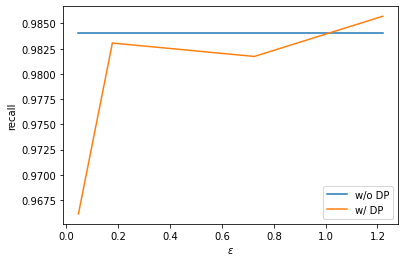

異常値を共有しているFLの小規模だけにDPを導入
小規模にノイズを加えるとrecallが下がる
auroc


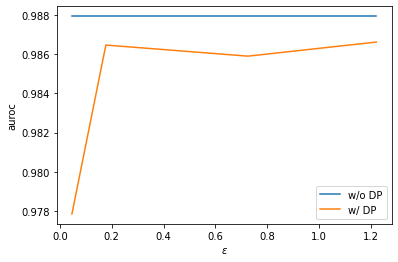

異常値を共有しているFLの小規模だけにDPを導入
小規模にノイズを加えると精度が下がる


In [84]:
epsilons = []
large_results = []
wo_dp_results = []

noises = [5,8,30,100]

eval_score = "recall"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    result_wo_dp, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)
    wo_dp_results.append(result_wo_dp)

print(eval_score)
plt.plot(epsilons, wo_dp_results, label="w/o DP")
plt.plot(epsilons, large_results, label="w/ DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("異常値を共有しているFLの小規模だけにDPを導入")
print("小規模にノイズを加えるとrecallが下がる")

##

epsilons = []
large_results = []
wo_dp_results = []

noises = [5,8,30,100]

eval_score = "auroc"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    result_wo_dp, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)
    wo_dp_results.append(result_wo_dp)

print(eval_score)
plt.plot(epsilons, wo_dp_results, label="w/o DP")
plt.plot(epsilons, large_results, label="w/ DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("異常値を共有しているFLの小規模だけにDPを導入")
print("小規模にノイズを加えると精度が下がる")
